In [25]:
import numpy as np
import matplotlib.pyplot as plt
import math 
from PyAstronomy import pyasl
%matplotlib inline

In [26]:
# # HMM input
# for ipara in range(len(para)):
#     paramter=para[ipara]    
    
#     Tot=300
#     dt=0.01
#     T=np.arange(dt,Tot,dt)
#     G = paramter
#     w = G/(2*1.06)
#     D=4
#     L=np.zeros(len(T))
#     V=np.zeros(len(T))
#     mu, sigma = 0, 1
#     for i in range(len(T)-1):
#         L[i+1]=L[i]+V[i]*dt
#         V[i+1]=(1-G*dt)*V[i]-w**2*L[i]*dt+math.sqrt(D*dt)*np.random.normal(mu, sigma)
#     plt.plot(T,L)

[       -inf -1.09160002 -0.59148375 -0.20188579  0.          0.45350327
  0.81336349  1.27595896         inf]
[       -inf -1.16859024 -0.63341753 -0.23252925  0.          0.47090215
  0.8534795   1.36316825         inf]
[       -inf -1.49025515 -0.86539335 -0.42931376  0.          0.35479835
  0.81250019  1.45051675         inf]
[       -inf -1.62781553 -0.96113716 -0.47660276  0.          0.403868
  0.89656324  1.58593115         inf]
[       -inf -2.01101633 -1.13191279 -0.52948489  0.          0.53117072
  1.12882252  1.87357748         inf]
[       -inf -2.24446913 -1.27689271 -0.59243105  0.          0.59327218
  1.22681099  2.08863685         inf]
[       -inf -2.69374741 -1.70525918 -0.88571753  0.          0.49773225
  1.2637269   2.23441379         inf]
[       -inf -3.10372487 -1.91130603 -1.01906188  0.          0.58473124
  1.44582766  2.613378           inf]


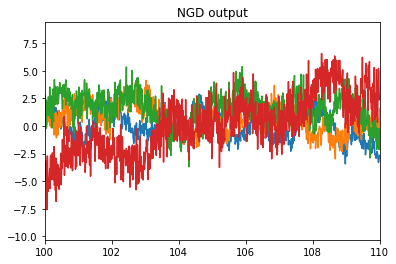

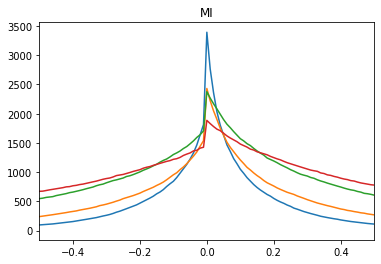

In [27]:
# OU
taupara=[0.5,0.8,1.5,3] # different values of parameter tau in OU
mpara=[2,4,6,10] # different values of filter order m in UNGD filter
Tot=300
dt=0.01
dtau=0.01
T=np.arange(dtau,Tot,dtau)
D = 4
L=np.zeros(len(T))
for j in range(len(taupara)):
    tau=taupara[j]
    mu, sigma = 0, 1
    for i in range(len(T)-1):
        L[i+1]=L[i]*(1-dt/tau)+math.sqrt(D*dt)*np.random.normal(mu,sigma)
    


# UNGD output
    x=L
    m=mpara[j]
    b=(3+m)/2
    FBsum=np.zeros(len(L))
    for k in range(m):
        fb=np.zeros(len(x))
        for i in range(len(x)):
            ck=(k+1)/m
            ytime=i/dt-(m-k)*dt
            ind=int(ytime*dt)
            if ind>0:
                fb[i]=ck*x[ind]
            elif ind<=0:
                fb[i]=0
        FBsum=FBsum+fb
    y=(3+m)/2*x-FBsum
    plt.figure(num=2)
    plt.title('NGD output')
    plt.plot(T,y)
    plt.xlim(100,110)
    
# assign data to different state
# state number should be even
    nx=8
    ny=8

    # states of input
    xs=x
    xs=np.sort(x)
    xstatestep=len(xs)/nx
    xinterval=[0]
    for i in range(int(nx/2-1)):
        xinterval=np.append(xinterval,xs[round(len(xs)/2)+(i+1)*round(xstatestep)])
    xinterval=np.append(xinterval,float('inf'))
    for j in range(int(nx/2-1)):
        xinterval=np.append(xs[round(len(xs)/2)-(j+1)*round(xstatestep)],xinterval)
    xinterval=np.append(float('-inf'),xinterval)
    print(xinterval)
    xstate=np.zeros(len(x))
    for i in range(len(x)):
        tempinterval=[]
        state=[]
        tempinterval=np.array(xinterval)
        tempinterval=np.append(tempinterval,x[i])
        tempinterval=np.sort(tempinterval)
        state=np.where(tempinterval==x[i])
        xstate[i]=state[0][0]

    # states of output
    ys=y
    ys=np.sort(y)
    ystatestep=len(ys)/ny
    yinterval=[0]
    for i in range(int(ny/2-1)):
        yinterval=np.append(yinterval,ys[round(len(ys)/2)+(i+1)*round(ystatestep)])
    yinterval=np.append(yinterval,float('inf'))
    for j in range(int(ny/2-1)):
        yinterval=np.append(ys[round(len(ys)/2)-(j+1)*round(ystatestep)],yinterval)
    yinterval=np.append(float('-inf'),yinterval)
    print(yinterval)
    ystate=np.zeros(len(y))
    for i in range(len(y)):
        tempinterval=[]
        state=[]
        tempinterval=np.array(yinterval)
        tempinterval=np.append(tempinterval,y[i])
        tempinterval=np.sort(tempinterval)
        state=np.where(tempinterval==y[i])
        ystate[i]=state[0][0]
        
        
# calculating mutual information
    negshift=-1 # second
    posshift=1 # second
    shiftdu=dt # second
    shiftlen=(posshift-negshift)/dt+1
    timeshift=np.linspace(negshift,posshift,shiftlen)
    bitshift=np.linspace(negshift/dt,posshift/dt,shiftlen)
    xedges=np.linspace(1,nx+1,nx+1) # states of x
    yedges=np.linspace(1,ny+1,ny+1) # states of y

    # shifted data
    # shift>0 => y shifted to positive side
    MI=np.zeros(len(bitshift))
    for i in range(len(bitshift)):
        xx=[]
        yy=[]
        shift=int(bitshift[i])
        if shift>0:
            xx=xstate[shift:]
            yy=ystate[:-shift]
        elif shift==0:
            xx=xstate
            yy=ystate
        elif shift<0:
            xx=xstate[:shift]
            yy=ystate[-shift:]

        H, xedges, yedges = np.histogram2d(xx, yy, bins=(xedges, yedges))
        statesum=np.sum(H)
        px_list=np.sum(H,axis=1)/statesum
        py_list=np.sum(H,axis=0)/statesum
        pxy_list=H/statesum

        MIsingle=np.zeros(len(xx))
        for j in range(len(xx)):
            px=px_list[int(xx[j]-1)]
            py=py_list[int(yy[j]-1)]
            pxy=pxy_list[int(xx[j]-1)][int(yy[j]-1)]
            MIsingle[j]=pxy*math.log2(pxy/px/py)
        MI[i]=np.sum(MIsingle)
    plt.figure(num=3)
    plt.title('MI')
    plt.plot(timeshift,MI)
    plt.xlim(-0.5,0.5)